# Insurance

## Dataset

Our dataset contains information about medical charges and includes the following columns:

__Age__: The age of the primary beneficiary.

__Sex__: The gender of the primary beneficiary (male or female).

__BMI__: The Body Mass Index (BMI) of the primary beneficiary:

- BMI < 18.5: __Underweight__
- 18.5 <= BMI < 24.9: __Healthy__
- 24.9 <= BMI < 29.9: __Overweight__
- BMI >= 29.9: __Obese__

__Children__: The number of children/dependents covered by the insurance.

__Smoker__: Indicates whether the beneficiary is a smoker or not.

__Region__: The region of residence of the beneficiary in the United States.

__Charges__: The individual medical costs billed by the insurance.

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from matplotlib.lines import Line2D

# Setting the style for Seaborn visualizations
sns.set_style("whitegrid")

In [104]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 1. Distribution Analysis for Key Columns

Analyzing the distribution of variables like `age`, `bmi`, `charges`, and `children` helps us understand their spread, common values, and whether there are any anomalies or outliers.

#### Visualizations:

**Histogram**:

- __Age__: Show the distribution of age to identify the most common age range among insurance holders.

- __BMI__: Analyze whether the BMI distribution skews toward obesity or leans toward healthy BMI ranges.

- __Charges__: Explore the distribution of insurance charges to identify if it's skewed due to high-cost outliers.

- __Number of children__: Visualize the count of individuals with specific numbers of children.


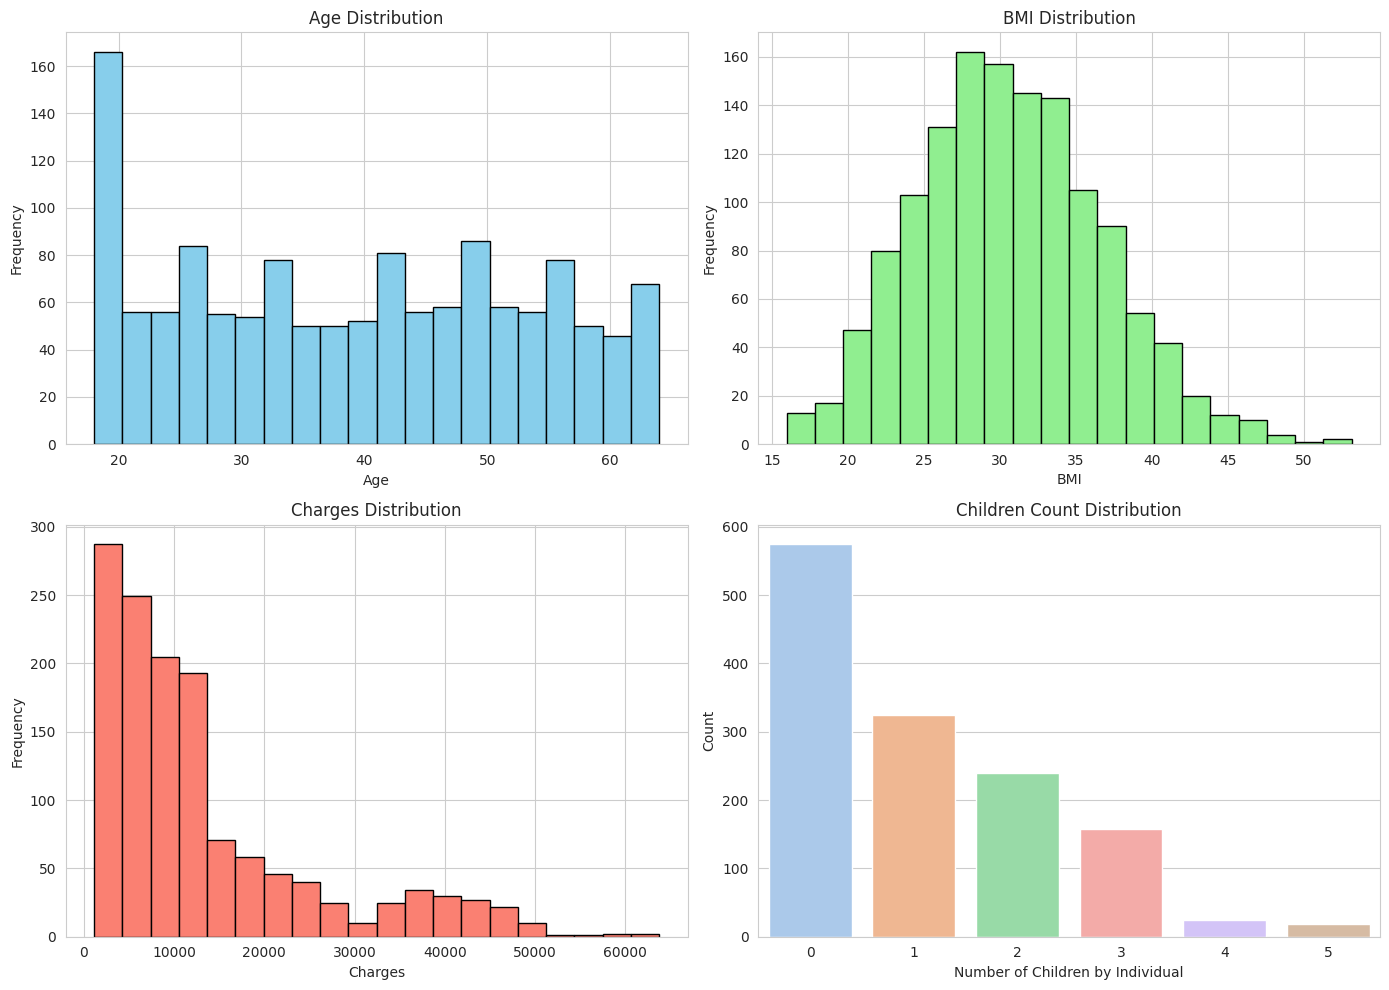

In [105]:
# Set up the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograms
axes[0, 0].hist(df['age'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(df['bmi'], bins=20, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('BMI Distribution')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(df['charges'], bins=20, color='salmon', edgecolor='black')
axes[1, 0].set_title('Charges Distribution')
axes[1, 0].set_xlabel('Charges')
axes[1, 0].set_ylabel('Frequency')

# Bar plot for 'children' column
sns.countplot(x='children', hue='children', data=df, ax=axes[1, 1], palette='pastel', legend=False)
axes[1, 1].set_title('Children Count Distribution')
axes[1, 1].set_xlabel('Number of Children by Individual')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


### 2. Relationship Between Smoking and Insurance Charges

Smoking can have a significant impact on insurance charges. Visualizing this relationship can confirm whether smokers pay higher premiums on average.

#### Visualizations:    

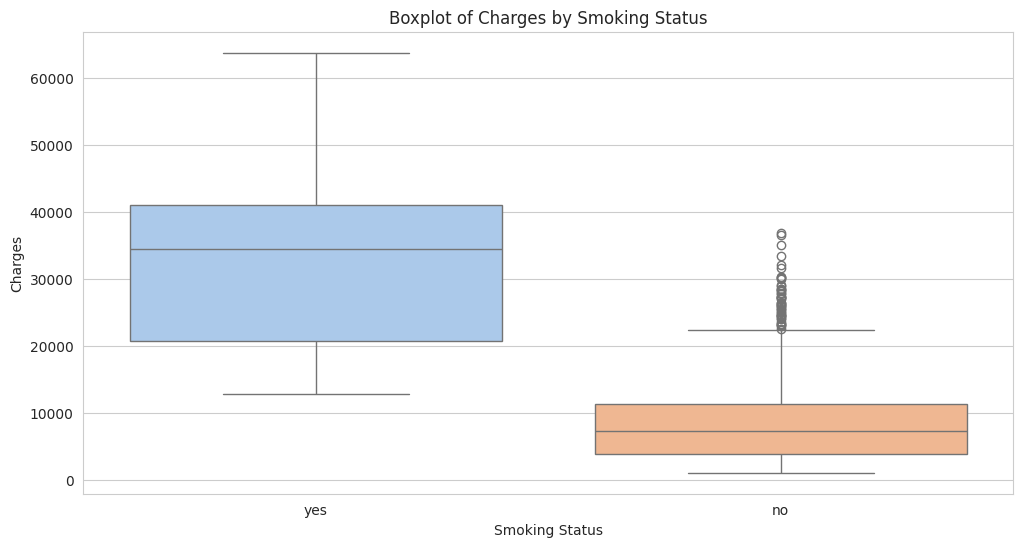

In [106]:
# Boxplot for smoker vs. non-smoker charges
plt.figure(figsize=(12, 6))
sns.boxplot(x='smoker', y='charges', data=df, hue='smoker', palette='pastel', legend=False)
plt.title('Boxplot of Charges by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Charges')
plt.show()

Show the distribution of charges for `smoker` vs. `non-smoker` groups. This will help highlight the difference in insurance costs based on smoking status.

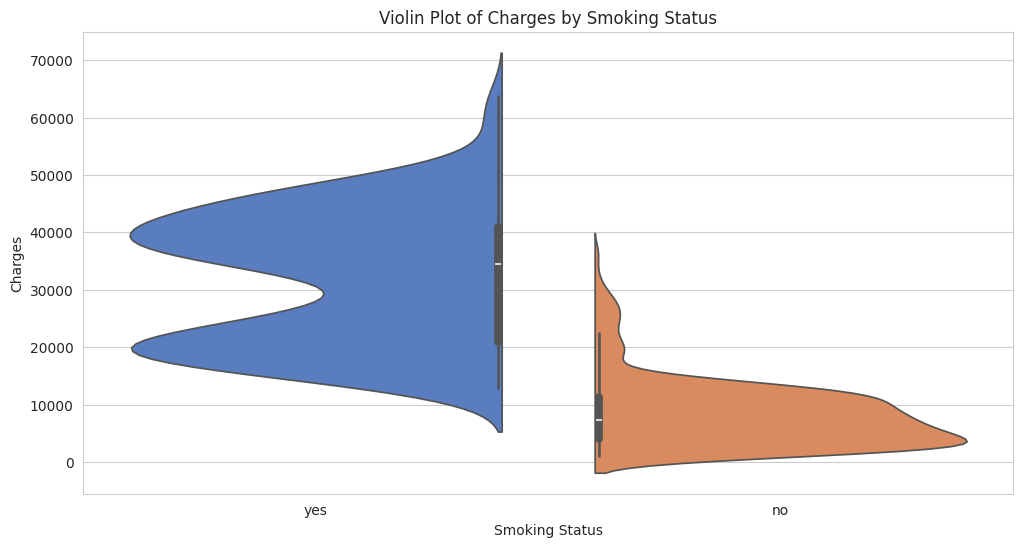

In [107]:
# Violin plot for smoker vs. non-smoker charges
plt.figure(figsize=(12, 6))
sns.violinplot(x='smoker', y='charges', data=df, hue='smoker', palette='muted', split=True, legend=False)
plt.title('Violin Plot of Charges by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Charges')
plt.show()

This violin plot can complement the boxplot by showing density distribution for charges based on the `smoker` values.


### 3. Age, BMI, and Charges Interaction

Both age and BMI are likely to influence insurance charges. Visualizing the interactions between these variables can help to identify how they combine to affect costs.

#### Visualizations:

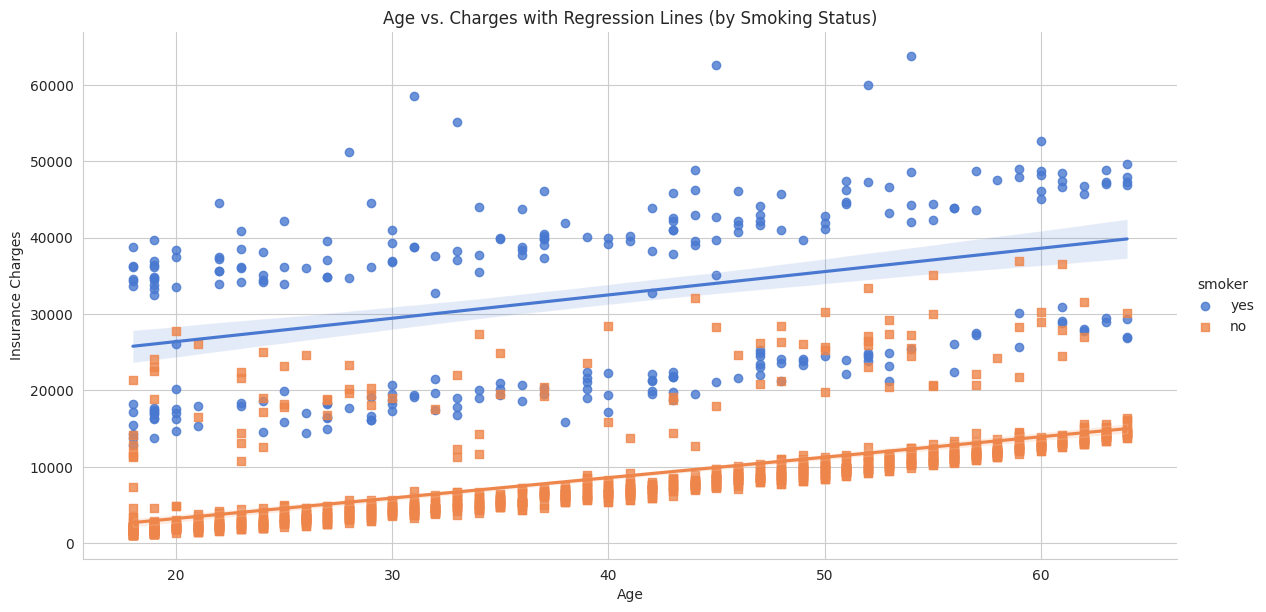

In [108]:
# Scatter Plot with Regression for 'age' vs. 'charges', color-coded by 'smoker' status
sns.lmplot(x='age', y='charges', hue='smoker', data=df, height=6, aspect=2, palette='muted', markers=['o', 's'])
plt.title('Age vs. Charges with Regression Lines (by Smoking Status)')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.show()

Scatter plot with regression lines for `age` vs. `charges`, color-coded by `smoker` status. This visualization can help identify trends like higher charges for older smokers.

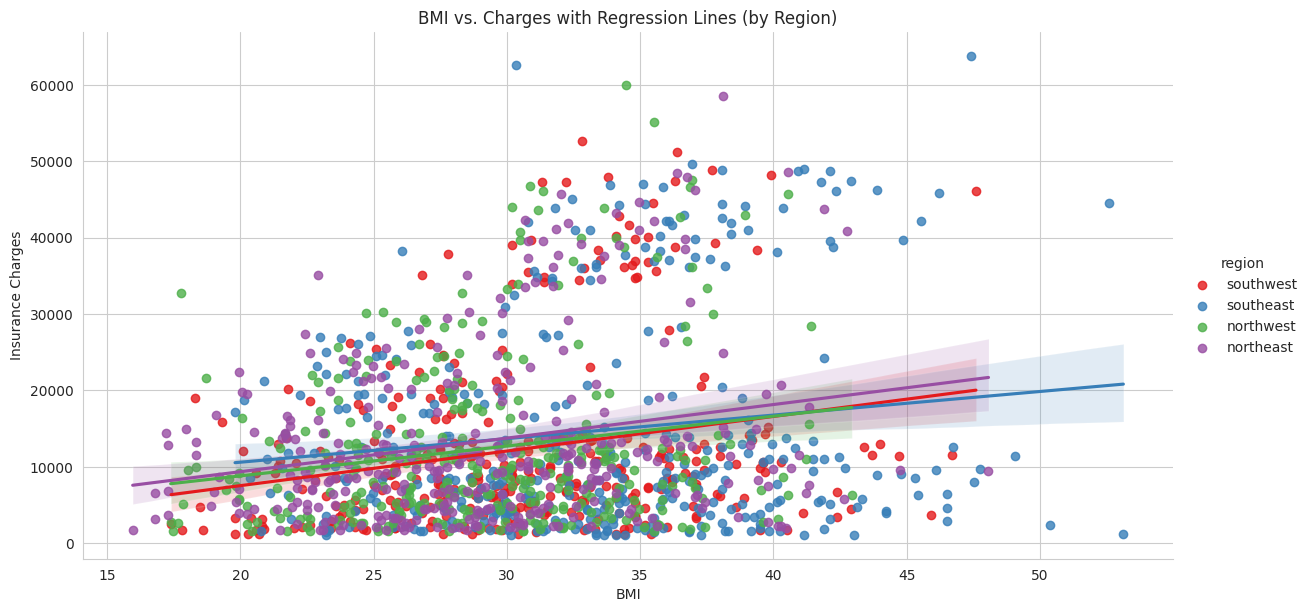

In [109]:
# Scatter Plot with Regression for 'bmi' vs. 'charges', color-coded by 'region'
sns.lmplot(x='bmi', y='charges', hue='region', data=df, height=6, aspect=2, palette='Set1')
plt.title('BMI vs. Charges with Regression Lines (by Region)')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.show()

This scatter plot with regression lines for `bmi` vs. `charges` is color-coded by `region`. It can help identify regional trends in insurance charges based on BMI.

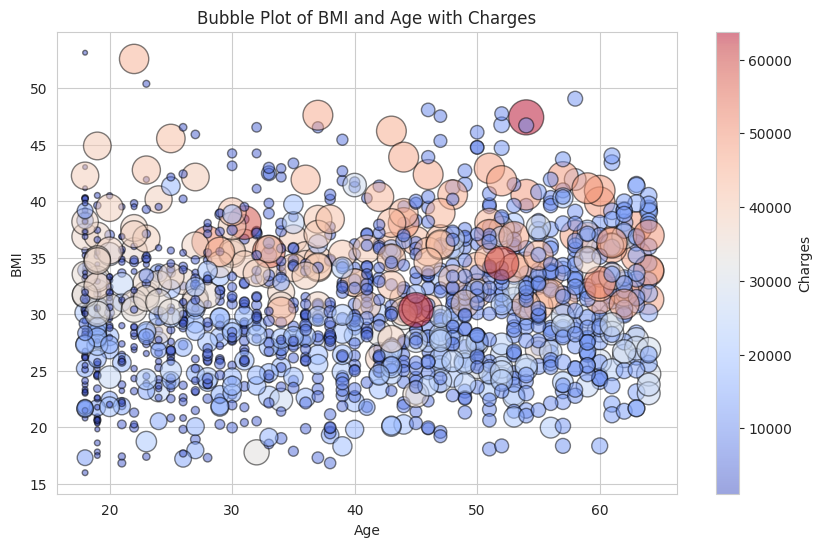

In [110]:
plt.figure(figsize=(10, 6))
bubble_sizes = df["charges"] / 100  # Scale down the sizes for better readability
plt.scatter(df["age"], df["bmi"], s=bubble_sizes, alpha=0.5, c=df["charges"], cmap="coolwarm", edgecolor="k")
plt.title("Bubble Plot of BMI and Age with Charges")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.colorbar(label="Charges")
plt.show()


pivot_table = df.pivot_table(index="age", columns="bmi", values="charges", aggfunc="mean")

The bubble plot above shows the relationship between `age`, `bmi`, and `charges`. The bubble sizes represent the insurance charges, with larger bubbles indicating higher charges.

### 4. Regional Distribution of Charges and Smokers

Insurance charges and lifestyle factors like smoking may vary across regions (`northeast`, `northwest`, etc.). Visualizing these regional trends is critical for understanding geographic variations.

#### Visualizations:

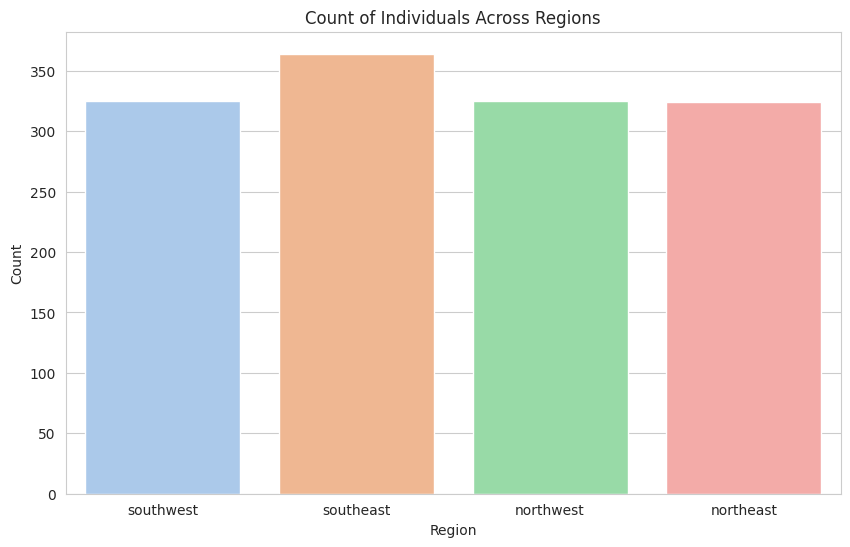

In [111]:
# Bar Plot: Count of individuals per region
plt.figure(figsize=(10, 6))
sns.countplot(x='region', hue='region', data=df, palette='pastel', legend=False)
plt.title('Count of Individuals Across Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

This bar plot displays the count of individuals in each region, providing insights into the distribution of the dataset across different regions.

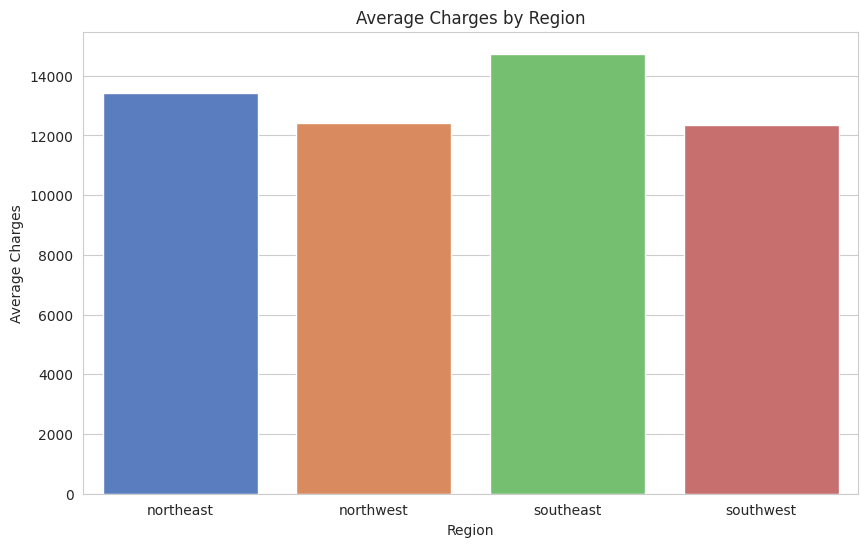

In [112]:
# Bar Plot: Average charges by region
plt.figure(figsize=(10, 6))
region_charges = df.groupby('region')['charges'].mean().reset_index()
sns.barplot(x='region', y='charges', hue='region', data=region_charges, palette='muted', legend=False)
plt.title('Average Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()

The bar plot above shows the average insurance charges by region, helping to identify regions with higher or lower costs.

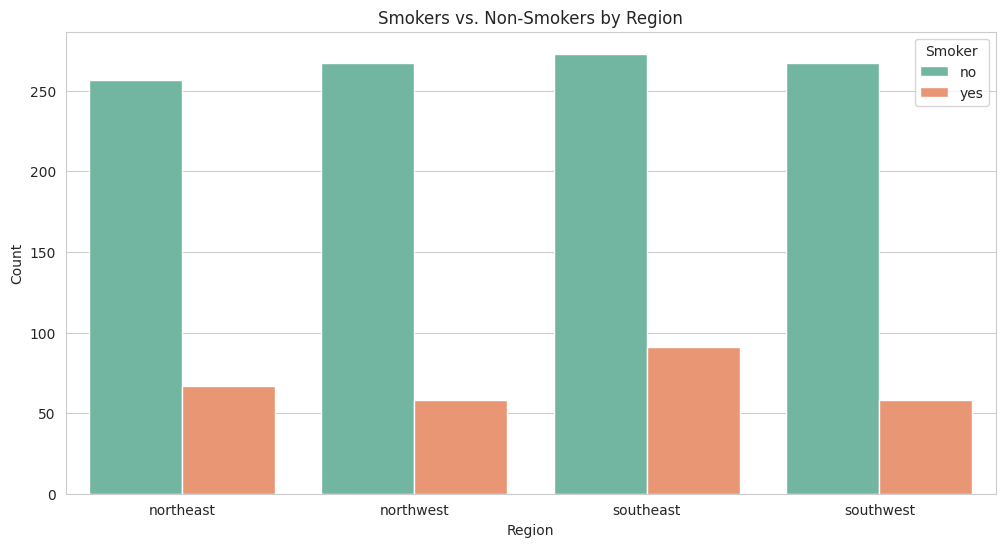

In [113]:
# Side-by-side Bar Plot: Smokers vs Non-Smokers by Region
plt.figure(figsize=(12, 6))
smoker_region = df.groupby(['region', 'smoker']).size().reset_index(name='count')
sns.barplot(x='region', y='count', hue='smoker', data=smoker_region, palette='Set2')
plt.title('Smokers vs. Non-Smokers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Smoker')
plt.show()

Here, the side-by-side bar plot shows the distribution of smokers vs. non-smokers across regions, providing insights into smoking habits by region.

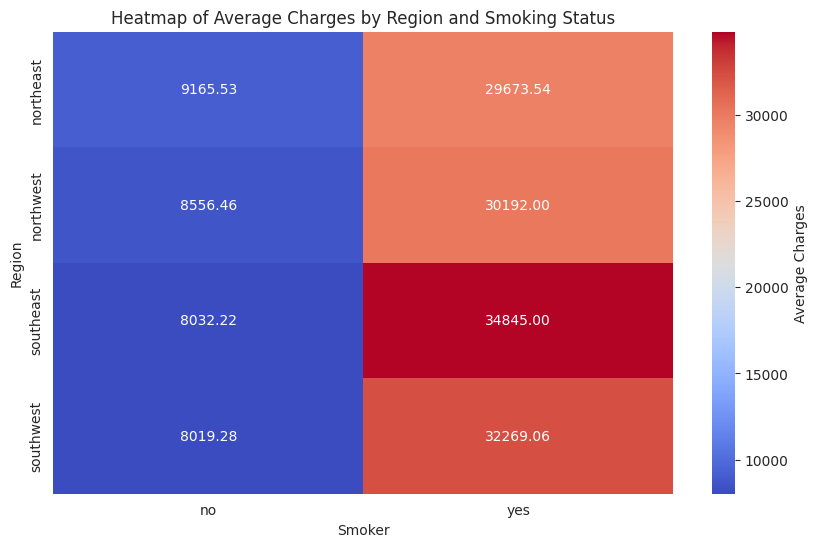

In [114]:
# Heatmap: Average charges by region and smoker status
heatmap_data = df.groupby(['region', 'smoker'])['charges'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Average Charges'})
plt.title('Heatmap of Average Charges by Region and Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Region')
plt.show()

In this heatmap, the average charges are displayed by region and smoker status, allowing for a quick comparison of regional costs based on smoking habits.


### 5. Impact of Number of Children on Charges
The number of children could be a factor influencing insurance costs. Understanding this relationship helps identify if individuals with more dependents pay substantially different premiums.
#### Visualizations:

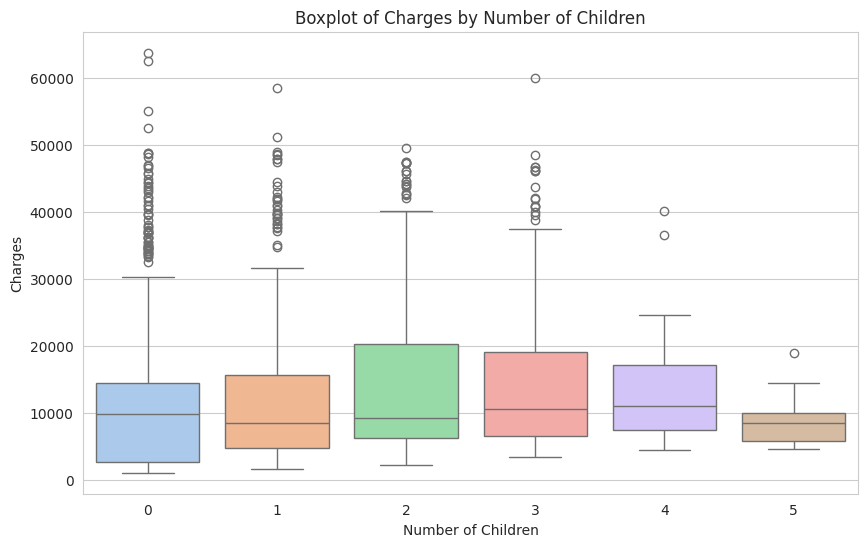

In [115]:
# Boxplot: Charges distribution by number of children
plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='charges', hue='children', data=df, palette='pastel', legend=False)
plt.title('Boxplot of Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

The boxplot above shows the distribution of insurance charges based on the number of children, helping to identify any significant differences in premiums.

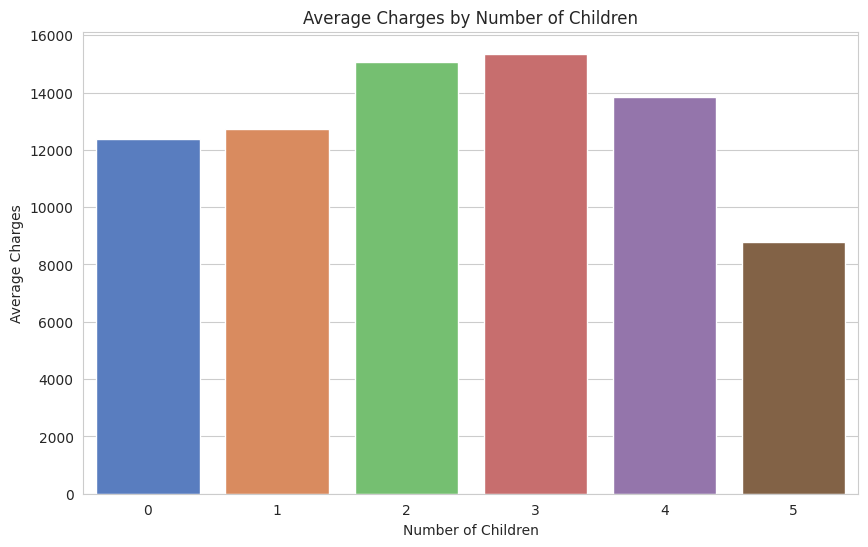

In [116]:
# Bar Chart: Average charges by number of children
plt.figure(figsize=(10, 6))
children_charges = df.groupby('children')['charges'].mean().reset_index()
sns.barplot(x='children', y='charges', hue='children', data=children_charges, palette='muted', legend=False)
plt.title('Average Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.show()

This bar chart displays the average insurance charges based on the number of children, providing insights into how premiums vary with the number of dependents.


### 6. Gender Analysis of Insurance Premiums
#### Justification:
Exploring whether gender (`sex`) plays a role in insurance charges could reveal if insurance premiums are influenced by gender biases or other factors.
#### Visualizations:

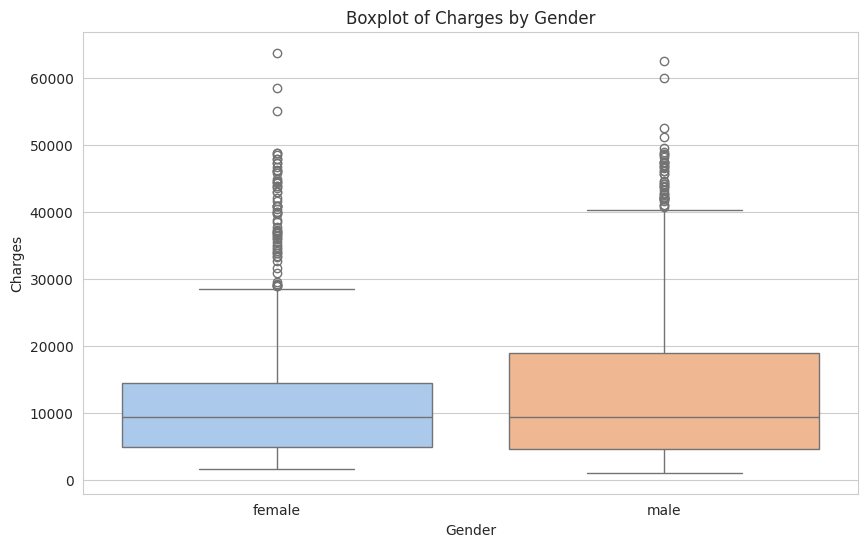

In [117]:
# Boxplot: Distribution of charges by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', hue='sex', data=df, palette='pastel', legend=False)
plt.title('Boxplot of Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()

This boxplot show the distribution of charges for male vs female individuals.

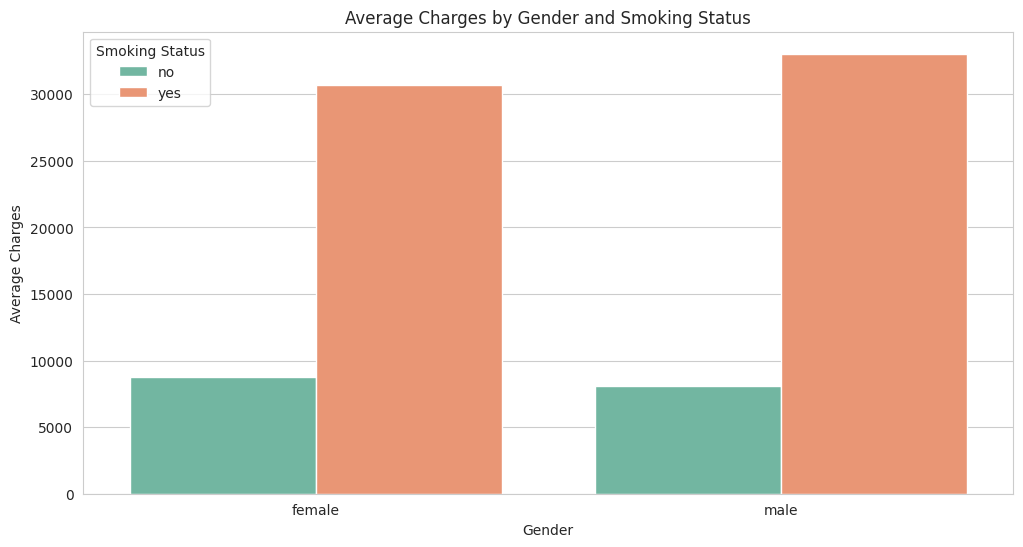

In [118]:
# Bar Chart: Average charges by gender and smoking status
plt.figure(figsize=(12, 6))
gender_smoker_charges = df.groupby(['sex', 'smoker'])['charges'].mean().reset_index()
sns.barplot(x='sex', y='charges', hue='smoker', data=gender_smoker_charges, palette='Set2')
plt.title('Average Charges by Gender and Smoking Status')
plt.xlabel('Gender')
plt.ylabel('Average Charges')
plt.legend(title='Smoking Status')
plt.show()

The bar chart above displays the average charges for male and female individuals, grouped by `smoker` and `non-smoker` categories.


### 7. Correlation Matrix
#### Justification:
A correlation matrix can help identify relationships between numerical variables such as `age`, `BMI`, `charges`, and `children`. This can direct further analysis toward the variables showing strong correlations.
#### Visualizations:

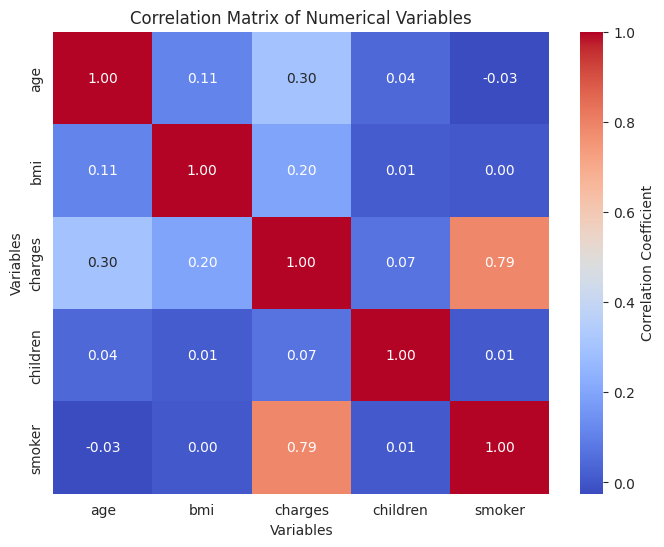

In [119]:
# Transform the 'smoker' column into binary values
matrix = df.copy()
matrix['smoker'] = matrix['smoker'].map({'yes': 1, 'no': 0})

# Calculate the correlation matrix
correlation_matrix = matrix[['age', 'bmi', 'charges', 'children', 'smoker']].corr()

# Generate the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

Create a correlation heatmap to visualize the strength of relationships between numerical variables.


### 8. High-Cost Outlier Analysis
Charge outliers (significantly higher premiums) could represent individuals with specific characteristics (e.g., smokers, high BMI, or elderly individuals). Investigating this provides insights into extreme cases.
#### Visualizations:

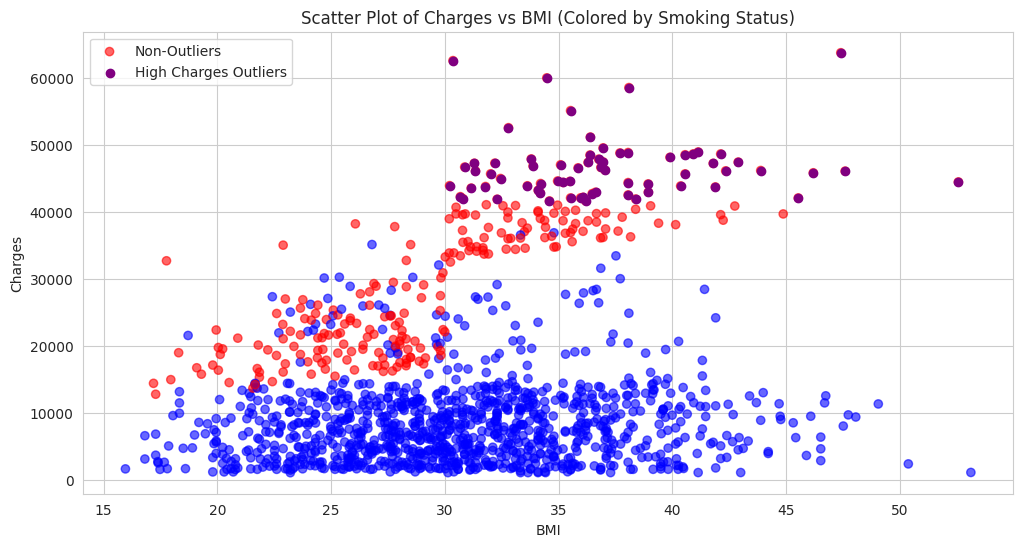

In [120]:
# Scatter plot: Charges vs BMI with high-cost outliers highlighted
plt.figure(figsize=(12, 6))
high_charge_threshold = df['charges'].quantile(0.95)
colors = {'yes': 'red', 'no': 'blue'}
scatter = plt.scatter(df['bmi'], df['charges'],
                      c=df['smoker'].map(colors),
                      alpha=0.6, label='Charges')
plt.scatter(df[df['charges'] > high_charge_threshold]['bmi'],
            df[df['charges'] > high_charge_threshold]['charges'],
            color='purple',
            label='High Charges Outliers')
plt.title('Scatter Plot of Charges vs BMI (Colored by Smoking Status)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(['Non-Outliers', 'High Charges Outliers'], loc='upper left')
plt.show()

Highlight individuals with very high charges and color the points by smoking and region to investigate patterns.

# Region Analysis
The following diagrams are showing the efficiency of a model trained on the regions

In [121]:

# Column names
region_col = 'region'
charges_col = 'charges'

# Regression Contributions by One-Hot Encoding (Trial Encoding)
# Encoding regions using one-hot encoding
encoder = OneHotEncoder(drop='first')
region_encoded = encoder.fit_transform(df[[region_col]]).toarray()
region_encoded_df = pd.DataFrame(region_encoded, columns=encoder.get_feature_names_out([region_col]))

# Prepare data for regression
X = pd.concat([region_encoded_df], axis=1)
y = df[charges_col]



## Description of the X Shape and Y Shape

In [122]:
print("X shape:", X.head())
print("y shape:", y.head())

X shape:    region_northwest  region_southeast  region_southwest
0               0.0               0.0               1.0
1               0.0               1.0               0.0
2               0.0               1.0               0.0
3               1.0               0.0               0.0
4               1.0               0.0               0.0
y shape: 0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64



## Mean squared error and R squared error

In [123]:

# Perform regression
model = LinearRegression()
model.fit(X, y)
print("Mean squared score: ", mean_squared_error(y, model.predict(X)))
print("R squared score: ", r2_score(y, model.predict(X)))
# Display regression coefficients for each region
coefficients = pd.DataFrame({
    'Region': encoder.get_feature_names_out([region_col]),
    'Coefficient': model.coef_
})

Mean squared score:  145570599.31768084
R squared score:  0.006634016807031462



As we can see here the R squared score is very bad and so we now that the region is not helping in any way to predict the charges someone will pay

## Regression coefficient and regression plot

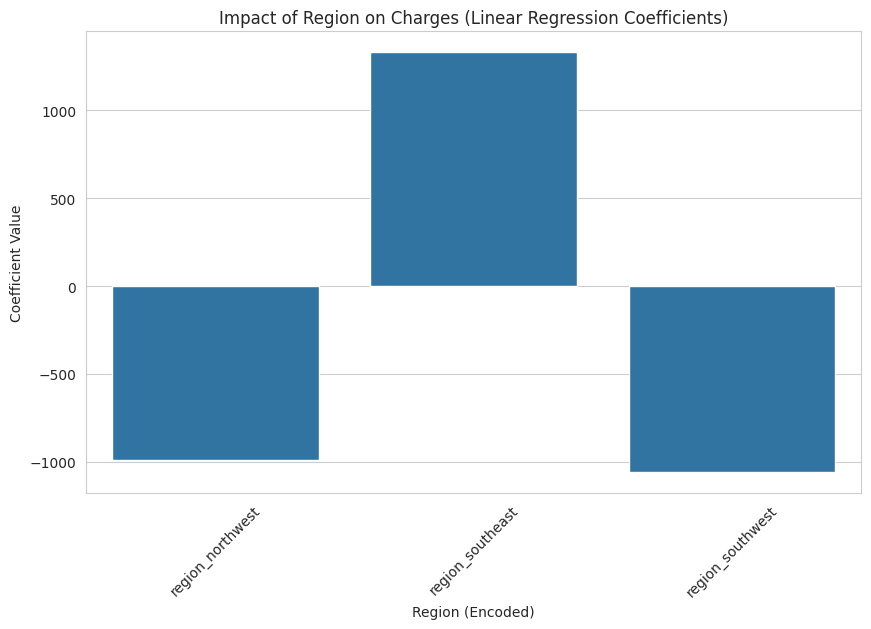

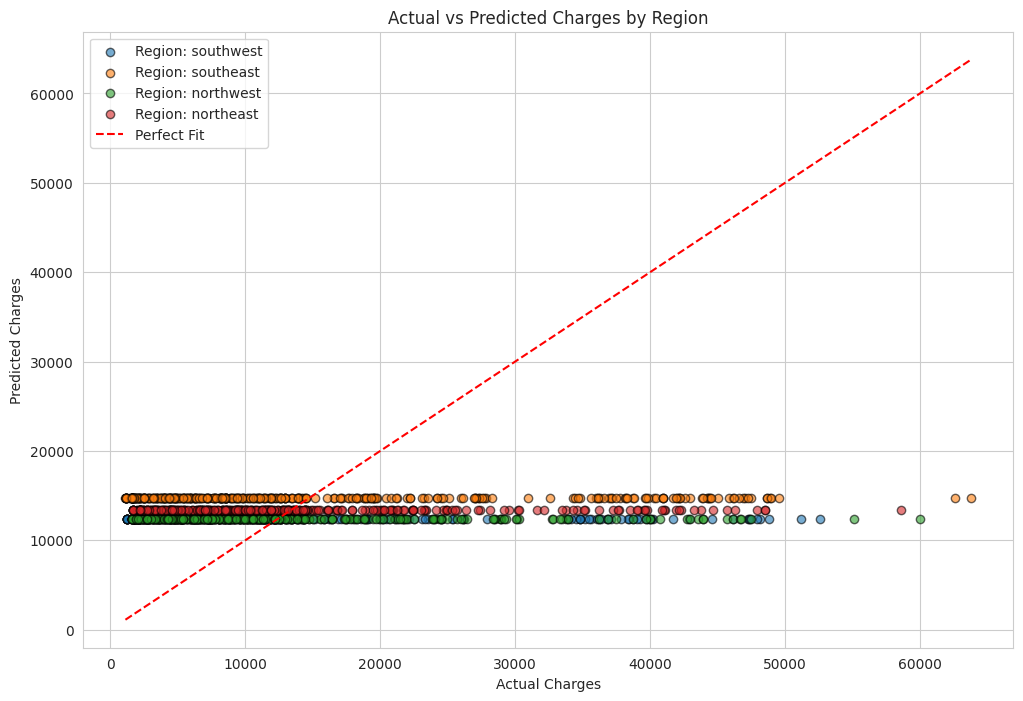

In [124]:
# Decision on Encoding
# If coefficients are significantly different across regions, stick with one-hot encoding.
# Otherwise, consider ordinal or other transformations based on the domain context.

plt.figure(figsize=(10, 6))
sns.barplot(x="Region", y="Coefficient", data=coefficients)
plt.title("Impact of Region on Charges (Linear Regression Coefficients)")
plt.xlabel("Region (Encoded)")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.show()

# Scatter Plot: Actual vs Predicted Charges
# Predict charges using the linear regression model
predicted_charges = model.predict(X)

results = df.copy()
results["Predicted_Charges"] = predicted_charges

# Plot Actual vs Predicted Charges for each region
regions = df[region_col].unique()
plt.figure(figsize=(12, 8))

for region in regions:
    region_data = results[results[region_col] == region]

    plt.scatter(
        region_data[charges_col],
        region_data["Predicted_Charges"],
        alpha=0.6,
        edgecolor='k',
        label=f"Region: {region}"
    )

# Ideal line (Perfect Prediction)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Perfect Fit")

# Plot settings
plt.title("Actual vs Predicted Charges by Region")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.legend()
plt.grid(True)
plt.show()

So as we can see here the regression is not helping in any way to determine the charges, it is predicting always the same thing because it is not correlated

In [125]:
# Step 1: Define BMI categories using bins
bins = [0, 18.5, 24.9, 29.9, df['bmi'].max()]
labels = ['Underweight', 'Healthy', 'Overweight', 'Obese']
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels)

# Step 2: One-hot encode the BMI categories
bmi_dummies = pd.get_dummies(df['bmi_category'], prefix="bmi")

# Step 3: Add these dummy columns to the DataFrame
regression_df = pd.concat([df, bmi_dummies], axis=1)

# Step 4: Drop one dummy variable to avoid multicollinearity (reference category)
# Here, we drop the 'Obese' column as the baseline
regression_df.drop(['bmi_Obese', 'bmi_category'], axis=1, inplace=True)

# Print transformed DataFrame
print(regression_df.head())


   age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

   bmi_Underweight  bmi_Healthy  bmi_Overweight  
0            False        False            True  
1            False        False           False  
2            False        False           False  
3            False         True           False  
4            False        False            True  
